In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [65]:
df_train = pd.read_csv('kaggle/input/titanic/train.csv')

In [66]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
#keep only non string columns of df_train
df_train2 = df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_train2.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [62]:
#df_train.corr()

<Axes: xlabel='Age', ylabel='Fare'>

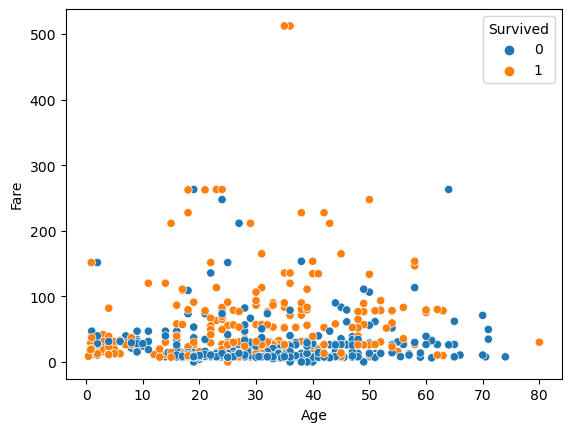

In [69]:
# It is simply showing that there are some persons who paid I think maximum amount of fare and 
# they also survived

sns.scatterplot(data=df_train, x='Age', y='Fare', hue='Survived')

<Axes: xlabel='Pclass', ylabel='Fare'>

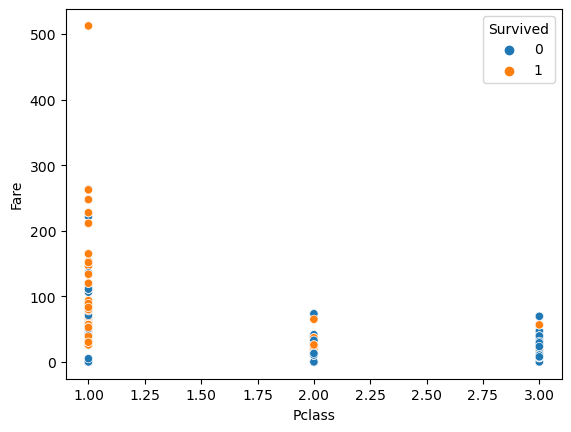

In [70]:
# Here we can see the Pclass 1 is more suvived than others.

sns.scatterplot(data=df_train, x='Pclass', y='Fare', hue='Survived')

In [71]:
# These persons are outliers

df_train[df_train['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [72]:
# Removing persons fare greater than 300

df_train.drop(index=[258, 679, 737], inplace=True)

<Axes: xlabel='Parch', ylabel='Fare'>

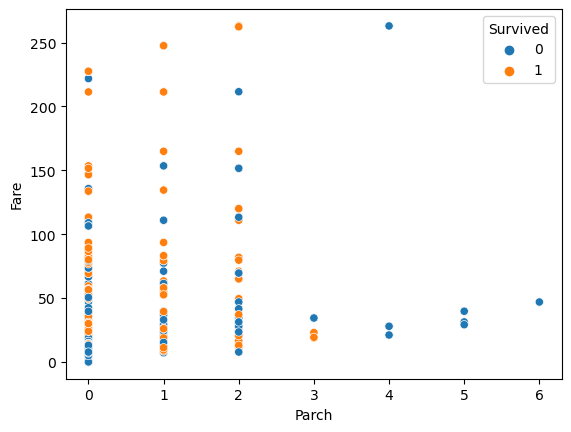

In [73]:
sns.scatterplot(data=df_train, x='Parch', y='Fare', hue='Survived')

In [74]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [75]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

<Axes: xlabel='Fare', ylabel='Embarked'>

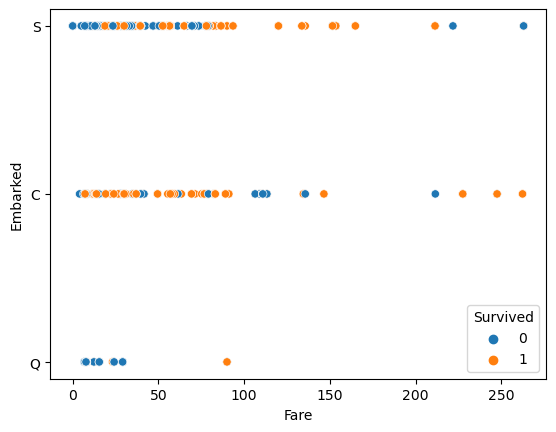

In [76]:
# From this plot we can see no matter which price but C enbarked having more chances of survival

sns.scatterplot(data=df_train, x='Fare', y='Embarked', hue='Survived')

In [77]:
df_train['Embarked'].fillna('S', inplace=True)

In [78]:
# It's time to remove the unwanted columns

df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [79]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.675345,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [80]:
# Making X and y
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [ ]:
X, y

In [81]:
X = pd.get_dummies(X)

In [ ]:
X

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
def model_1(model):
    model = model
    model.fit(X_train_scaled, y_train)
    prediction = model.predict(X_test_scaled)
    X_train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
    X_test_accuracy = accuracy_score(y_test, prediction)
    print('X_train_accuracy',X_train_accuracy)
    print('X_test_accuracy', X_test_accuracy)
    print()
    print('Confusion Metrix:')
    print(confusion_matrix(y_test, prediction))

In [86]:
grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [ ]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train_scaled, y_train)

In [ ]:
rf_cv.best_params_

In [87]:
# Logistic Model
model_1(LogisticRegression(solver='liblinear' , C=50))

X_train_accyracy 0.7938808373590982
X_test_accuracy 0.8314606741573034

Confusion Metrix:
[[139  21]
 [ 24  83]]


In [88]:
# Forest Model
model_1(RandomForestClassifier(n_estimators=200,max_depth=5, criterion='gini',max_features='sqrt', random_state=18))

X_train_accyracy 0.8647342995169082
X_test_accuracy 0.8389513108614233

Confusion Metrix:
[[151   9]
 [ 34  73]]


In [89]:
# Ada Model
model_1(AdaBoostClassifier(n_estimators=121, random_state=101))

X_train_accyracy 0.8454106280193237
X_test_accuracy 0.8239700374531835

Confusion Metrix:
[[140  20]
 [ 27  80]]


In [90]:
# main_model = LogisticRegression(solver='liblinear' , C=50)
main_model = RandomForestClassifier(n_estimators=200,max_depth=5, criterion='gini',max_features='sqrt', random_state=18)
main_model.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=18)

In [91]:
df_test = pd.read_csv('kaggle/input/titanic/test.csv')

In [92]:
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [93]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [94]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [95]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [96]:
df_test = pd.get_dummies(df_test)

In [97]:
df_test_scaled = scaler.fit(df_test)

In [98]:
pred = main_model.predict(df_test)

In [99]:
df2 = pd.read_csv('kaggle/input/titanic/test.csv')

In [100]:
pred2 = []

for i in pred:
    if i == 1:
        pred2.append(True)
    else:
        pred2.append(False)

In [101]:
output = pd.DataFrame({'PassengerId': df2['PassengerId'],
                        'Survived' : pred})

In [102]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
output.to_csv('submission.csv', index=False)